--- Model Parameters ---
Slope (m): 9789.26
Intercept (c): 23124.18

--- Evaluation Metrics ---
Mean Squared Error: 53043596.14
R-squared Score: 0.8247


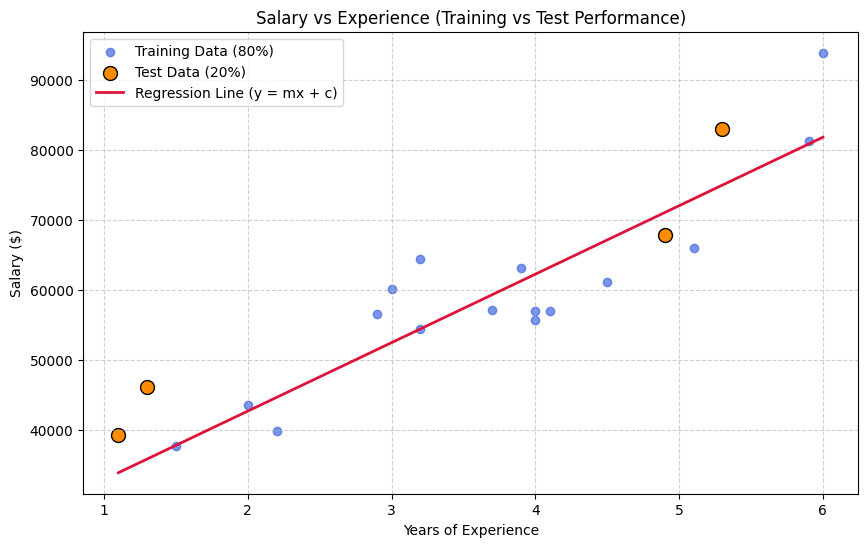

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. CREATE THE DATASET
# Imagine this is Years of Experience vs. Salary
data = {
    'Years_Exp': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0],
    'Salary': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940]
}
df = pd.DataFrame(data)

# Reshape X to be a 2D array (Scikit-Learn requirement)
X = df[['Years_Exp']] 
y = df['Salary']

# 2. SPLIT THE DATA
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. TRAIN THE MODEL
model = LinearRegression()
model.fit(X_train, y_train) # This is where the math (Gradient Descent) happens!

# 4. EVALUATE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Model Parameters ---")
print(f"Slope (m): {model.coef_[0]:.2f}")
print(f"Intercept (c): {model.intercept_:.2f}")
print("\n--- Evaluation Metrics ---")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")

# 5. VISUALIZATION
plt.figure(figsize=(10, 6))

# Plot training points (Blue)
plt.scatter(X_train, y_train, color='royalblue', label='Training Data (80%)', alpha=0.7)

# Plot test points (Orange/Gold) - These are the "Final Exam" points
plt.scatter(X_test, y_test, color='darkorange', label='Test Data (20%)', s=100, edgecolors='black')

# Plot the regression line (The model's "Logic")
# We predict over the whole range of X to show the line
plt.plot(X, model.predict(X), color='crimson', linewidth=2, label='Regression Line (y = mx + c)')

plt.title('Salary vs Experience (Training vs Test Performance)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()